<a href="https://colab.research.google.com/github/CASSIOSOUZA/Exercicio-BTCC/blob/master/RegressaoLinear_Hand02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import numpy as np
pd.set_option('display.max_columns', 500)

In [ ]:
!wget https://raw.githubusercontent.com/jpvmm/Fasam_Analytics/master/auto-mpg.csv

--2020-09-12 03:07:54--  https://raw.githubusercontent.com/jpvmm/Fasam_Analytics/master/auto-mpg.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 18131 (18K) [text/plain]
Saving to: ‘auto-mpg.csv.1’

auto-mpg.csv.1      100%[===================>]  17.71K  --.-KB/s    in 0.01s   

2020-09-12 03:07:54 (1.45 MB/s) - ‘auto-mpg.csv.1’ saved [18131/18131]



In [ ]:
!ls

auto-mpg.csv  auto-mpg.csv.1  sample_data


In [ ]:
data = pd.read_csv('./auto-mpg.csv')

In [ ]:
data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    object 
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model year    398 non-null    int64  
 7   origin        398 non-null    int64  
 8   car name      398 non-null    object 
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


In [ ]:
data.horsepower = pd.to_numeric(data.horsepower, errors='coerce') #Converto em numericos

data = data.dropna()

In [ ]:
data.corr(method='pearson')

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
mpg,1.000000,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,0.565209
cylinders,-0.777618,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.568932
displacement,-0.805127,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.614535
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.455171
weight,-0.832244,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.585005
acceleration,0.423329,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.212746
model year,0.580541,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.181528
origin,0.565209,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,1.000000


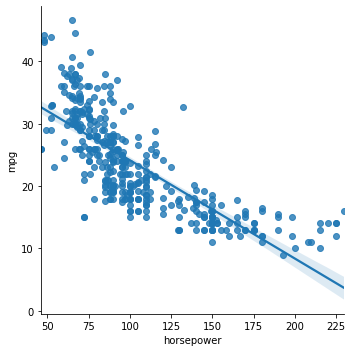

In [ ]:
sns.lmplot(x="horsepower", y="mpg", data=data);

## Ajustando uma reta aos dados:

In [ ]:
lr = LinearRegression()

In [ ]:
lr

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
#Estabelecendo dados e labels

x = data.horsepower.values #Utiliza apenas os valores data coluna
x = x.reshape(-1,1) #Reshape para input de regressão linear
y = data.mpg #Utiliza apenas os valores da coluna MPG como Labels
x.shape

(392, 1)

In [ ]:
y.shape

(392,)

In [ ]:
lr.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
print(lr.coef_)

[-0.15784473]


In [ ]:
print(lr.intercept_)

39.93586102117047


## Correção de Dados Nulos ou Incorretos

In [ ]:
data = pd.read_csv('./auto-mpg.csv')
data.horsepower = pd.to_numeric(data.horsepower, errors='coerce')


In [ ]:
#Localizando quantidade de valores nulos por coluna
null_columns=data.columns[data.isnull().any()]
data[null_columns].isnull().sum()

horsepower    6
dtype: int64

In [ ]:
data[data['horsepower'].isnull()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,NaN,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,NaN,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,NaN,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,NaN,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,NaN,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,NaN,3035,20.5,82,1,amc concord dl


In [ ]:
a = lr.coef_[0]
b = lr.intercept_

mpg = a*140 + b
horsepower = (18-b)/a

print('mgp = ', mpg)
print('horsepower = ', horsepower)

mgp =  17.837598351658958
horsepower =  138.971130395734
